# 本周内容的概括：
 - 有监督的学习
 - 

# 1. 决策树


例子：
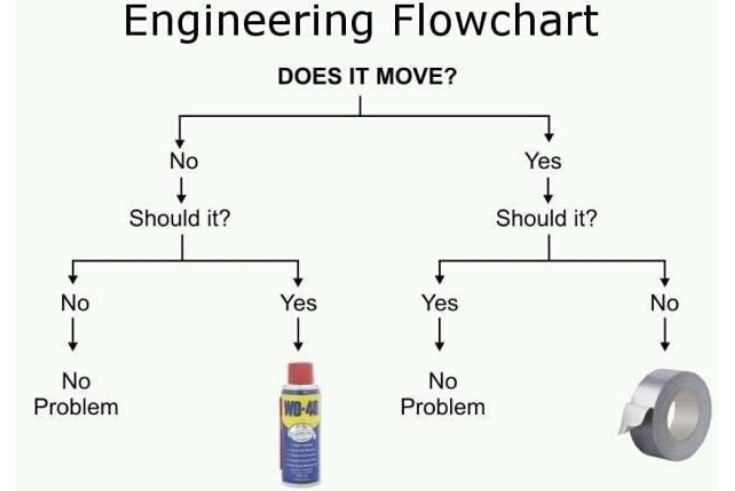

> 实质：
> 
> - 决策树的实质就是在不同的时候问不同的问题
> 
> - 也算是一种特殊的表，即node的结合

> 特点：
>
> - 作为树，其每个节点都只有一个输入edge
>
> - 每个节点代表一次check
>
> - 每次check都是对label的一次检查
>
> - 叶子节点就代表一个结果

> 怎么用肉眼构建决策树？
>
> - 他没有提供统一的方法论，我的总结：
> - 挨个看所有标签，看标签能不能把数据分成一组纯的一组杂的，直到两组都是纯的为止

> 如何提升泛化能力？
> - 节点数量越少越好 

> 如何建构决策树？
>
> - 目标：用训练数据找到一个尽可能小的树
>
> - 指导思想：把“分类效果最显著”的点放在靠近根的位置。

> 怎么衡量分类效果的高低？
>
> - 香农熵
>
> $\begin{equation} H(X) = -\sum\limits_{X}p(x)log(p(x)) \end{equation}$
>
> - 香农熵对于二元分类问题，可以简化为：
> $\begin{equation}B(q)=-(q log_{2}q+(1-q)log_{2}(1-q))\end{equation}$
>
> 如果数据集对于你的终极目标问题有`p`个pos数据，`n`个nega数据，那你的分类终极目标所需要的总熵为：
> $H(Goal) = B(\frac{p}{p+n})$
>
> 每个问题都会提供$H(goal)$的一部分，这就引出了information gain的问题：

In [7]:
import math

def B(q): # q = p/(p+n)
    return -(q*math.log2(q)+(1-q)*math.log2(1-q))

print(B(0.5))

1.0


> information gain:
>
> - 一个问题`A`把数据集分成d个组，每个组有两部分：$p_k$个pos点和$n_k$个neg点。 此处的p和n都是对于终极问题的p和n
> - 那在经过问题`A`之后，剩余（Remainder）的熵为：
> $\begin{equation}\begin{align} Remainder(A) &= \sum\limits^{d}_{k=1}\frac{p_k+n_k}{p+n}B\left(\frac{p_k}{p_k+n_k}\right)\\
&= \sum\limits^{对中间问题分出来的所有组：} \frac{分到这组里的数据数}{进入这个问题前的总数据数}B\left(\frac{终极问题的p}{分进这组的所有}\right)
 \end{align}\end{equation}$
>
> 
>
> - 那gain怎么算呢？
> $\begin{equation} Gain(A)=B\left(\frac{p}{p+n}\right)-Remainder(A) \end{equation}$

> 计算例子：
>
> - 我的终极问题会把数据平分，也就意味着目标是$B(0.5)=1 bit$
>
> - 现在来了一个中间问题，他把`8`个数据点分成两组：
> 
>     - 对中间问题`positive`的：2个终极n
>     - 对中间问题`negative`的：2个终级n，四个终极p
>
>     - 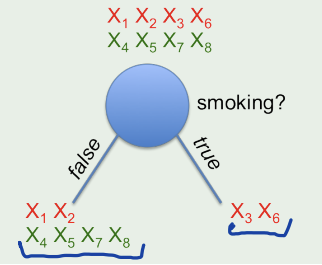
>
> 根据上述公式计算：
>  $Remainder = \frac{2}{8}B(1)+\frac{6}{8}B\left(\frac{2}{6}\right)\approx0.689 bits$
>
>  - $\frac{2}{8}$：经过此中间问题之后，其中一组(右)内含`8`个数据点中的`2`个
>  - $B(1)$: 这个两人的组里全都是终极p，$\frac{2}{2+0}=1$
>  - $\frac{6}{8}$: 此中间问题分出的第二组(左)中含`8`个数据点里的`6`个
>  - $B(\frac{2}{6})$: $\frac{2个终极p（红色）}{组内总数6个}$
>
> 那么，$Gain(此问题) = 1-0.689=0.311 bits$
> 

> 具体算法流程我就不看了，万一要看就参照Week16 DecisionTree P23/36吧，OneNote里也有更详细的解释

> 由于其高可解释性，决策树在医学领域很常用 

> 修剪决策树：
>
>  - 修剪决策树可以提升决策树的泛化能力
>  - 修剪：保留这个节点，但是抹掉节点下属的一切
>  - 核心思想：如果不分类造成的误分类误差比分类造成的误分类误差小，那还不如不分类
>  - 如何操作：
>  1. 计算节点的`mcp`
>       - mcp计算公式：
>       - $\begin{equation} mcp = \frac{k-c+1}{k+2} \end{equation}$
>           - k:进入此节点的总数据数
>           - c: 经过此节点问题后，被分出来的大头部分的数据个数
>           - 例如：一个节点收到`6`个数据，根据此节点的分类问题，将其分为两组:`4`和`2`，则其$mcp = \frac{6-4+1}{6+2}$
>  2. 计算节点的`backup error`
>       - $backup error = \sum 子节点可能性*子节点error$
>       - 子节点可能性就是这个子节点占父节点中所有数据点的个数
>  3. 计算`error`
>       - $error = min(backup error, mcp)$
>       - 对于叶子节点，其error为其mcp。
>  4. 判断：
>  > 如果一个节点的`backup error`大于其`error`，这个节点就可以修掉

In [17]:
# MCP计算

'''
description: 计算mcp
param {*} k: 一共！一共有多少数据点
param {*} c: 分类后的大头有多少数据点
return {*} mcp值
'''
def mcp(k,c): 
    return(k-c+1)/(k+2)

print(mcp(3,2))

0.4


> 随机决策树森林：
> 对一定数量（`T`棵）的树：
>   - 随机选出`n`个数据（比如说，选出总数据集中的66%）
>   - 对每棵树：
>       - 对每个节点：
>           - 从所有预测器变量中随机选取`m`个
>           - 用表现最好的预测器变量来塞进这个节点里作为分类标准
>           - 选取`m`的标准：
>               - Random Splitter Selection: m=1
>               - Breiman's Bagger：m = 预测器变量总数
>               - Random Forest：m<<预测器变量总数
>
>   - 预测：当一个新的输入被输入到系统中时，它将沿着所有的树运行。结果可能是所有到达的终端节点的平均数或加权平均数，或者，在分类变量的情况下，是投票的多数。
>
>  - 优点：
>       - 快
>       - 可以处理不均衡的以及部分缺失的数据
>  - 缺点：
>       - 用于回归时，无法对超出训练集范围以外的东西进行预测
>       - 可能对有噪声的数据集过拟合
>  - 影响其性能的主要指标：
>       - 最大允许树深度`D`
>       - 随机性的程度和随机的类型
>       - 森林大小（树的数目`T`）
>       - weak learner model 的选择
>       - 训练时使用的objective function
>       - 实际使用时选择的features

# 2. 深度学习


先是废话：关于什么是人的神经元

然后：人工神经元的结构：


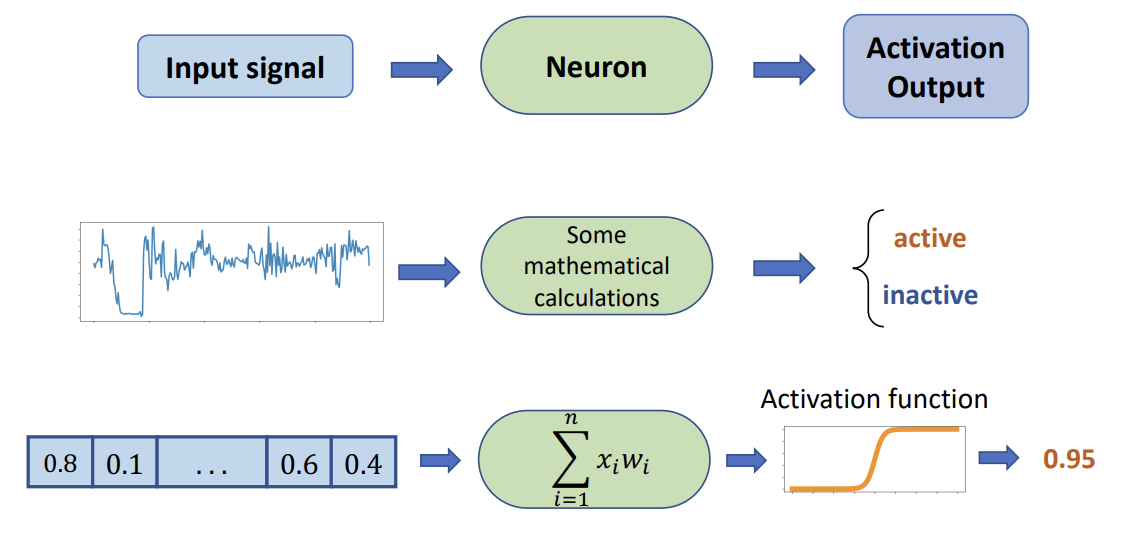

没啥新鲜的，就是输入->*权重+偏置->激活函数

所谓深度学习就是有老么些中间层

> Loss Function:
>  - 衡量网络输出和真值之间差距的其中一种函数
>  - 量化网络输出的好坏，loss越小越好
>  - 交叉熵Loss：最常用的loss之一
>    - 交叉熵衡量目标分布和估计分布的区别
>
> SoftMax:
>   - 将输入的一组一维实数向量归一化
>   - 即，结果的所有值都在0~1，且和为1

> 那，怎么训练呢？
>
> 梯度下降
>
> 太典了我不想说了，详参Week16PDF DeepLearning_2 P10左右
>
> 完整的梯度下降要算的话计算强度太高，一般采取数据集中的邮费来梯度下降（SGD，mini-batch GD）


> 反向传播